In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic, norm, multivariate_normal
from scipy.optimize import minimize
from numpy.linalg import norm

In [2]:
data = np.genfromtxt("data/faithful/faithful.txt", dtype=float, delimiter='')
data.shape

(272, 2)

In [3]:
data[:10]

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ]])

In [4]:
data_normal = (data - data.mean(axis = 0))/(data.max(axis = 0) - data.min(axis = 0))

In [5]:
data_normal[:10]

array([[ 0.03206197,  0.15288568],
       [-0.48222374, -0.31881243],
       [-0.04422374,  0.05854606],
       [-0.34422374, -0.16786903],
       [ 0.2986334 ,  0.26609323],
       [-0.17279517, -0.29994451],
       [ 0.34634769,  0.322697  ],
       [ 0.03206197,  0.26609323],
       [-0.4393666 , -0.3754162 ],
       [ 0.24634769,  0.26609323]])

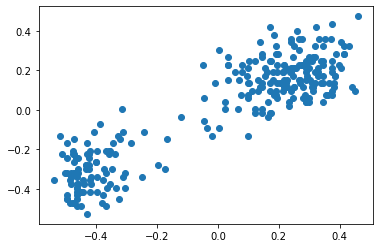

In [6]:
plt.scatter(data_normal[:,0], data_normal[:, 1])
plt.show()

In [7]:
#plt.scatter(data[:,0], data[:, 1])
#plt.show()

# Implement EM algorithm for GMM.

In [8]:
def E_update_Gaussian_Mixture(x, pi, Mu, Sigma):
    
    """
    x: data points of shape N x d
    pi: the mixture probability distribution
    Mu: a K x d matrix whose rows are the mean of the corresponding gaussian dis.
    Sigma: a K x d x d tensor such that Sigma[i] is a  corresponding covariamce matrix of i-th gaussian dis.
    
    return: a n x K matrix gamma which is p(z_{nk} = 1|x_n)
    """
    N, d = x.shape
    K = pi.shape[0]
    gamma = np.zeros((N,K))
    for i in range(K):
        gamma[:, i] =  multivariate_normal.pdf(x, mean = Mu[i], cov = Sigma[i])
    gamma = gamma * pi
    gamma = gamma/gamma.sum(axis = 1, keepdims = True)
    
    return gamma

In [9]:
def M_step_Gaussian_Mixture(x, gamma, Mu):
    
    N = gamma.sum(axis = 0) # K,
    pi = N/N.sum()
    
    Mu = (gamma.T @ x)/N.reshape(-1,1) # K x d
    
    K = Mu.shape[0]
    
    n,d = x.shape
    
    Sigma = np.zeros((K, d, d))
    
    for i in range(K):
        Sigma[i,:,:] = 1/N[i] * (gamma[:,i].reshape(-1,1) * (x - Mu[i])).T @ (x - Mu[i])
    return pi, Mu, Sigma    

In [10]:
def phi(x, Mu, Sigma, pi):
    N, d = x.shape
    K = Mu.shape[1]
    z = x.reshape(N, 1, d)
    y = np.zeros((N,K))
    for i in range(K):
        y[:,i] = multivariate_normal.logpdf(x, mean = Mu[i], cov = Sigma[i]) + np.log(pi[i])
    Phi = np.argmin(y , axis = 1)
    return Phi 

In [11]:
def plot(x, Mu, Sigma, pi, title, n_clusters = 2):
    Phi = phi(x, Mu, Sigma, pi)
    for i in range(n_clusters):
        plt.scatter(x[Phi == i][:,0], x[Phi == i][:,1] , color = colors[i])
    for i in range(n_clusters):
        plt.scatter(Mu[i][0],Mu[i][1], color = 'black', marker = '*')
    plt.title(title)
    plt.show()

In [12]:
def EM_Gaussian_Mixture(x, n_clusters = 2, Mu = None, Sigma = None):
    K = n_clusters
    _, d = x.shape
    #print(d)
    
    
    pi = 1/K * np.ones(K)
    if Mu is None:
        Mu = np.random.normal(0,1 , size = (K,d))
    
    if Sigma is None:
        Sigma = np.zeros((K,d,d))
        for i in range(K):
            Sigma[i] = np.eye(d)
    
    c = 0
    while True:
        c += 1
        if c in [1, 2, 5, 100]:
            plot(x, Mu, Sigma, pi, title = 'Clusters after {} iteration(s)'.format(c))
            
        gamma = E_update_Gaussian_Mixture(x, pi, Mu, Sigma)
        pi_new, Mu_new, Sigma_new = M_step_Gaussian_Mixture(x, gamma, Mu)
        if c >= 150:
            return pi_new, Mu_new, Sigma_new
        else:
            pi = pi_new 
            Mu = Mu_new
            Sigma = Sigma_new

In [13]:
colors = ['y', 'm', 'r']

In [14]:
Mu_initial = np.array([[1,-1],[-1,1]])
Mu_initial

array([[ 1, -1],
       [-1,  1]])

In [15]:
Sigma = np.zeros((2,2,2))
Sigma[0] = .1*np.eye(2)
Sigma[1] = .1*np.eye(2)

In [16]:
data_normal.shape

(272, 2)

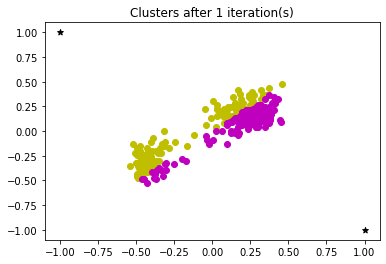

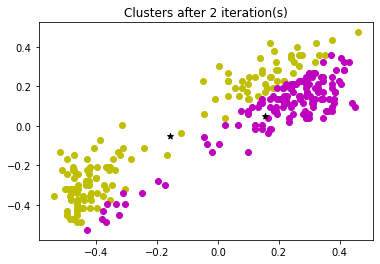

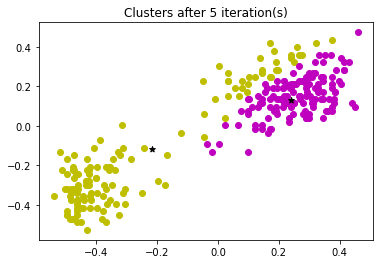

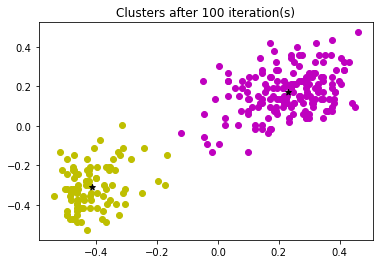

In [17]:
pi, Mu, Sigma = EM_Gaussian_Mixture(x = data_normal, n_clusters = 2, Mu = Mu_initial, Sigma = Sigma)

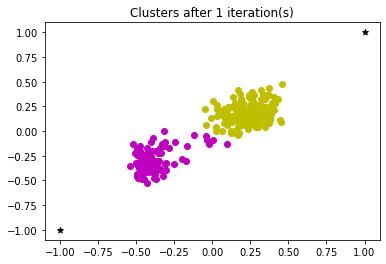

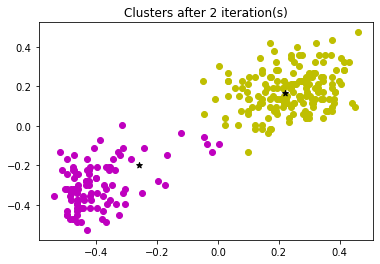

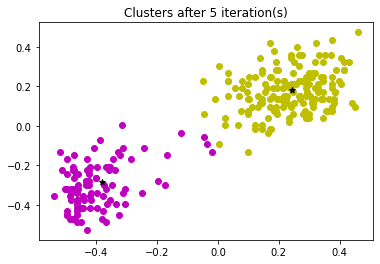

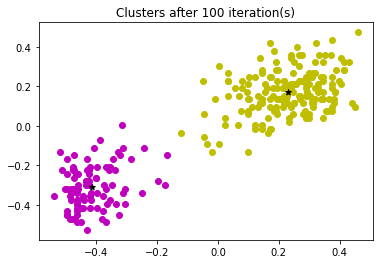

In [18]:
Mu_initial = np.array([[-1,-1],[1,1]])
Mu_initial

Sigma = np.zeros((2,2,2))
Sigma[0] = .5*np.eye(2)
Sigma[1] = .5*np.eye(2)

pi, Mu, Sigma = EM_Gaussian_Mixture(x = data_normal, n_clusters = 2, Mu = Mu_initial, Sigma = Sigma)

In [19]:
pi, Mu, Sigma

(array([0.35587286, 0.64412714]),
 array([[-0.41468418, -0.30978382],
        [ 0.22910825,  0.17115201]]),
 array([[[0.00564634, 0.00234592],
         [0.00234592, 0.01199618]],
 
        [[0.01387497, 0.00507067],
         [0.00507067, 0.0128324 ]]]))